In [ ]:
import math
from matplotlib import pyplot as plt

def read_coords(filename):
    with open(filename, "r") as f:
        lines = [line.strip() for line in f if line.strip()]
    # if the last line is a recap, remove it:
    if lines and lines[-1].startswith("Total"):
        lines = lines[:-1]
    coords = []
    for line in lines:
        parts = line.split()
        for i in range(0, len(parts), 2):
            if len(coords) < int(i/2) + 1:
                coords.append([])
            try:
                x = float(parts[i])
                y = float(parts[i+1])
                coords[int(i/2)].append((x, y))
            except ValueError:
                continue
    return coords

In [ ]:
ORIGINAL = "512.txt"
MODIFIED = "256.txt"

ground_truth = read_coords(ORIGINAL)
test_data = read_coords(MODIFIED)

nsteps = len(ground_truth)

errors = [[] for _ in range(len(ground_truth[0]))]
for i in range(nsteps):
    for j in range(len(ground_truth[i])):
        gx, gy = ground_truth[i][j]
        tx, ty = test_data[i][j]
        error = math.sqrt((gx - tx)**2 + (gy - ty)**2)
        errors[j].append(error)

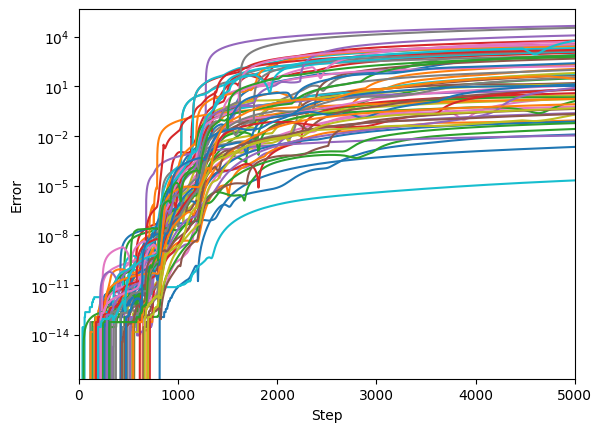

In [ ]:
plt.plot(errors)
plt.xlabel("Step")
plt.ylabel("Error")
plt.yscale("log")
plt.xlim(0, len(errors))
plt.show()